In [16]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

sns.set_style('whitegrid')


# Load Data

In [22]:
tracks = pd.read_csv('../../data/processed/tracks_processed.csv', dtype=object)
tracks = tracks.set_index(['track_year_created'])

tracks.head()

,Unnamed: 0,track_id,album_date_created,album_date_released,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,...,track_interest,track_language_code,track_listens,track_number,track_title,bit_rate_factor,listens_factor,interest_factor,track_price,track_length
track_year_created,,,,,,,,,,,,,,,,,,,,,
2008,0,2,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,4656,en,1293,3,Food,0.7,2,1.0,3.49,less than 3 minutes
2008,1,3,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,1470,en,514,4,Electric Ave,0.7,3,0.1,0.35,between 3 and 5 minutes
2008,2,5,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,1933,en,1151,6,This World,0.7,2,0.7,2.45,between 3 and 5 minutes
2008,3,10,2008-11-26 1:45,2008-02-06 0:00,4,6,47632,[],Constant Hitmaker,2,...,54881,en,50135,1,Freeway,0.5,1,1.0,2.5,less than 3 minutes
2008,4,20,2008-11-26 1:45,2009-01-06 0:00,2,4,2710,[],Niris,13,...,978,en,361,3,Spiritual Level,0.7,4,0.1,0.35,between 5 and 7 minutes


In [23]:
#tracks = tracks.dropna()

#X_columns=["track_listens","interest_factor"]
X_columns=["listens_factor","interest_factor"]
tracks = tracks[X_columns]

# normalize the columns

track_norm = tracks.copy()
track_norm
for col in X_columns:
    track_norm[col] = StandardScaler().fit_transform(track_norm[col].values.reshape(-1, 1))

#print(tracks.shape)
track_norm

/home/cloudera/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,listens_factor,interest_factor
track_year_created,,
2008,-0.616543,1.298125
2008,0.057028,-1.319063
2008,-0.616543,0.425729
2008,-1.290114,1.298125
2008,0.730600,-1.319063
2008,1.404171,-1.319063
2008,0.057028,-0.155868
2008,1.404171,-0.737466
2008,1.404171,-0.737466


# Model Training

In [24]:
k = 10
kmeans = KMeans(n_clusters=k).fit(track_norm.values)

print(set(kmeans.labels_))
print(collections.Counter(kmeans.labels_))

tracks_results = tracks.copy()
track_norm['cluster'] = kmeans.labels_
tracks_results['cluster'] = kmeans.labels_


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Counter({0: 26242, 2: 14602, 5: 12877, 1: 12097, 4: 9077, 6: 8504, 3: 7655, 8: 6203, 7: 4378, 9: 4264})


# Analyze the results

[('2016', 5268), ('2015', 4833), ('2013', 3773), ('2014', 3189), ('2012', 3020)]
[('2010', 2146), ('2012', 1603), ('2013', 1561), ('2011', 1525), ('2009', 1192)]
[('2016', 2363), ('2015', 2221), ('2013', 1921), ('2014', 1623), ('2010', 1534)]
[('2009', 1221), ('2010', 1006), ('2012', 966), ('2013', 903), ('2016', 891)]
[('2010', 1480), ('2011', 1301), ('2013', 1198), ('2012', 1144), ('2009', 1098)]
[('2016', 2249), ('2015', 2143), ('2013', 1761), ('2014', 1564), ('2012', 1475)]
[('2009', 1335), ('2010', 1261), ('2013', 1032), ('2011', 1021), ('2012', 890)]
[('2010', 944), ('2009', 853), ('2011', 731), ('2013', 571), ('2012', 547)]
[('2009', 1049), ('2017', 1001), ('2016', 869), ('2010', 849), ('2011', 693)]
[('2009', 882), ('2011', 795), ('2010', 792), ('2012', 775), ('2013', 471)]
listens_factor


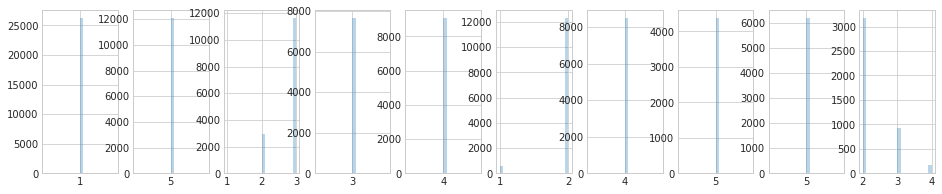

interest_factor


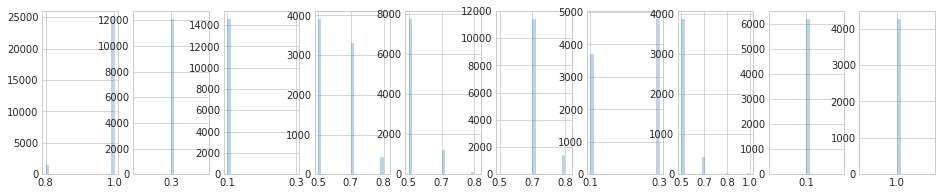

In [26]:

tracks_results = tracks_results.reset_index()
for cluster in sorted(set(kmeans.labels_)):
    print(collections.Counter(tracks_results[tracks_results['cluster']==cluster]['track_year_created']).most_common(5))

n_clusters = len(set(kmeans.labels_))
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(kmeans.labels_)):
        plt.subplot(1, n_clusters, i)
#        plt.xlim([0,tracks_results[col].max()])
        plt.hist(tracks_results[tracks_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()
